# Pymaceuticals Inc.
---

### Analysis

Summary Statistics:
The summary statistics data frame outlines each drug regimen's mean, median, variance, standard deviation, and standard error. The data frame can conclude that ramicane treatment has the lowest values for all of the statistics matrix:
	mean: 40.22
	median: 40.67
	variance: 23.49
	standard deviation: 4.85
	standard error: 0.32
 Capomulin has the second lowest satistical values:
	mean: 40.68
	median: 41.56
	variance: 24.95
	standard deviation: 4.99
	standard error: 0.33
These values strongly suggest the potential of ramicane and capomulin treatments in reducing tumor volume. In contrast, Stelasyn has the highest statistics values, indicating little to no influence on tumor volume. Therefore, the data frame points to ramicane and capomulin as the preferred drug regimens for mouse tumor reduction. 

Bar Chart: 
The bar chart illustrates the number of observed mice time points and their different drug regimens. The chart reveals a significant correlation between the lowest-valued drugs, capomulin (230) and ramicane (228). Both drug regimens have the highest observed time points, displaying that these drugs have been in the trial process longer to understand their effectiveness and consistency. However, propriva has the lowest number of observed time points, 148, indicating that its lack of effectiveness or changes may be the cause for its small record. 

Pie Chart:
The pie chart illustrates the gender distribution of the mice: 51% of the experiment population is male, while the remaining 49% are females. This balanced distribution allows researchers to gain a dependable understanding of how each drug affects both genders. 

Quartiles, Outliers, and Box Plot:
The cells in this section calculated the required data to create a boxplot. The first two cells take the data from the original data frame (cleand_df) to create a new one (sort_data) emphasizing values for four main drug regimens: capomulin, ramicane, infusion, and ceftamin. By setting the upper and lower quartiles, the IQR, lower, and upper bound values were calculated to find the number of outlier(s). According to the boxplot, one outlier was defined by the red circle marker (infubinol). Infubinol had the highest median among all four treatments, signifying that this drug has a low possibility of tumor reduction. Moreover, capomulin and Ramicane show a meaningful difference in tumor volume. 

Line and Scatter Plots:
The line plot shows a relationship between tumor volume and timepoint in days for the capomulin treatment. The line demonstrates a rapid increase in tumor volume within the first 20 days of treatment in mice, expressing that the capomulin treatment did not affect the tumor initially. Between day 20 and day 25, the chart shows a significant decrease in the tumor size from 48 mm3 to 44 mm3. As the days passed, the tumor size decreased to 40.5 by day 35, showing promising results in the mouse getting the capomulin treatment. However, between day 35 and day 40, there is a slight increase in tumor size to 41.5 mm3. The direction is influential as it reveals the potential effectiveness of the capomulin treatment over time, with a slight growth in tumor size towards the end of the treatment period. 
The scatter plot data points show a positive correlation between weight and average tumor size in mice undergoing the capomulin treatment. The mice with an average weight of 18g or lower tend to have a low tumor size under 40 mm3. Therefore, the larger mice are more likely to have increased tumor size, which may influence their treatment progression and change. 

Correlation and Regression:
The last chart highlights the positive correlation between mouse weight and tumor volume using a regression line. Most data points are close to the regression line, whereas a few are spread out. This positive linear regression can be used to make future predictions on mouse weight and tumor volume. 

Overall, all charts have emphasized that the capomulin drug treatment is the leading regimen to reduce tumor size in mice while considering their gender, timepoint, and weight. 
 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how='inner')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice.
number_of_mice = combined_df['Mouse ID'].nunique()
number_of_mice

249

In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID' ].unique()
duplicate_data   

array(['g989'], dtype=object)

In [12]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicate_data = combined_df[combined_df['Mouse ID'].isin(duplicate_data['Mouse ID'])]
print(all_duplicate_data)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [ ]:
# Checking the number of mice in the clean DataFrame.
updated_total_mice = clean_df['Mouse ID'].nunique()
updated_total_mice

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    tumorvolume_mean=('mean'),
    tumorvolume_med=('median'),
    tumorvolume_var=('var'),
    tumorvolume_std=('std'),
    tumorvolume_sem=('sem')
).reset_index()


summary_statistics.columns= ['Drug Regimen',
                            'Mean Tumor Volume', 
                            'Median Tumor Volume',
                            'Tumor Volume Variance', 
                            'Tumor Volume Std. Dev', 
                            'Tumor Volume Std. Err.'
                            ]

summary_statistics.set_index('Drug Regimen', inplace=True)
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
columns = pd.MultiIndex.from_product([["Tumor Volume (mm3)"], ['mean', 'median', 'var', 'std', 'sem']])
summary_statistics.columns = columns
summary_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

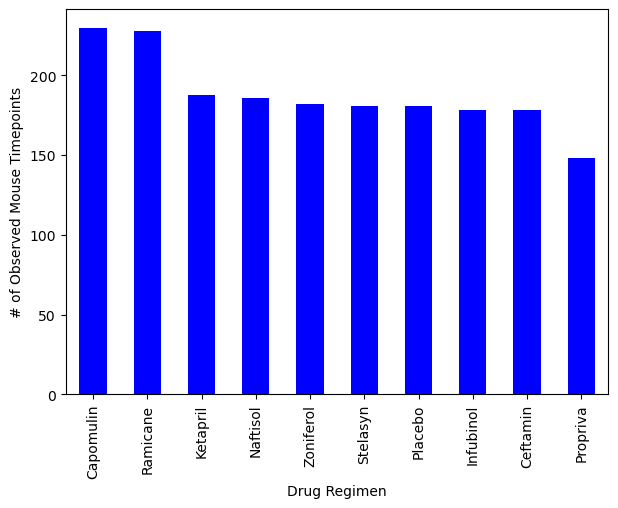

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen with the Pandas
drug_regimen_total = clean_df['Drug Regimen'].value_counts()
#drug_regimen_total

# Create a bar plot
drug_regimen_total.plot(kind='bar', color=['blue'], figsize=(7,5),
                        xlabel="Drug Regimen",
                        ylabel="# of Observed Mouse Timepoints"
                        )

# Show the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

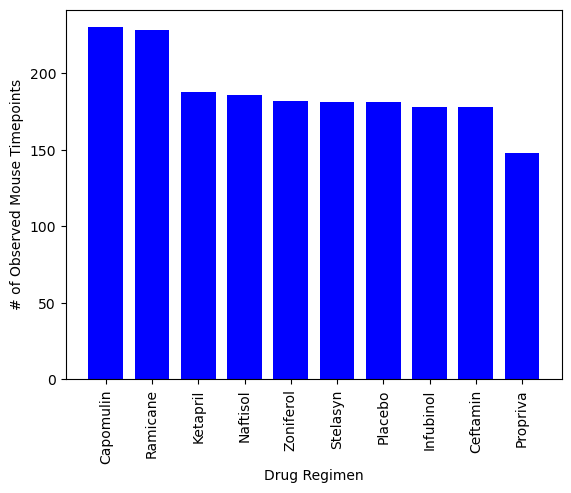

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
drug_regimen_total = clean_df['Drug Regimen'].value_counts()

# Create a bar plot
plt.bar(drug_regimen_total.index, drug_regimen_total, color='blue', width=.75)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation = 90)

# Show the plot
plt.show

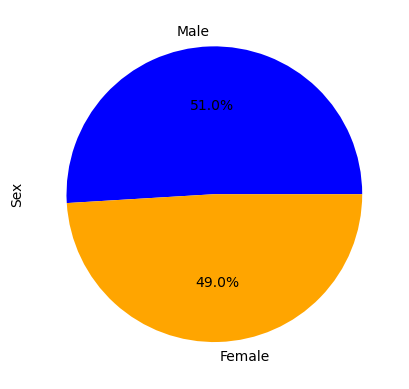

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = clean_df['Sex'].value_counts()

# Create a pie chart 
male_vs_female.plot(kind='pie', colors=['blue', 'orange'], labels=["Male", "Female"], autopct="%1.1f%%")
plt.ylabel("Sex")

# Show the chart
plt.show()

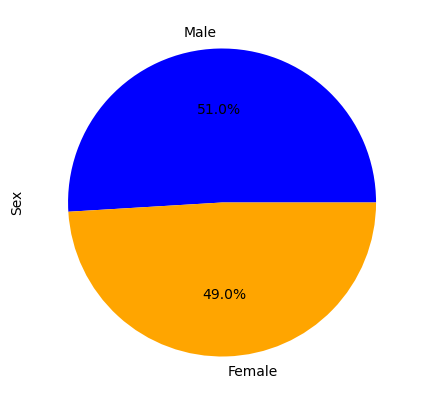

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = clean_df[clean_df['Sex'] == 'Male'].shape[0]
female = clean_df[clean_df['Sex'] == 'Female'].shape[0]
counts = [male, female]
labels = ['Male', 'Female']

# Create the pie chart
plt.figure(figsize=(7, 5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.ylabel('Sex')

# Show the chart
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = pd.DataFrame(clean_df.groupby('Mouse ID')["Timepoint"].max())
new_merged_df = pd.merge(clean_df, last_timepoint, on=['Mouse ID', 'Timepoint'], how='right')
new_merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [24]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
four_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
sort_data = new_merged_df[new_merged_df['Drug Regimen'].isin(four_treatments)]
sort_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_outliers = sort_data.loc[sort_data["Drug Regimen"]== treatment]['Tumor Volume (mm3)'] #filters through the data to find tumor volume values for each treatment it loops through

    tumor_volume.append(treatment_outliers)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_outliers.quantile([0.25, 0.5, 0.75])
    lower_quartiles = quartiles[0.25]
    upper_quartiles = quartiles[0.75]
    IQR = upper_quartiles - lower_quartiles
    lower_bound = lower_quartiles - (1.5 * IQR)
    upper_bound = upper_quartiles + (1.5 * IQR)

    final_outliers = treatment_outliers.loc[(treatment_outliers < lower_bound) | (treatment_outliers > upper_bound)]
    
    print(f'{treatment} treatment potential outliers: {final_outliers}')


Capomulin treatment potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane treatment potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol treatment potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin treatment potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


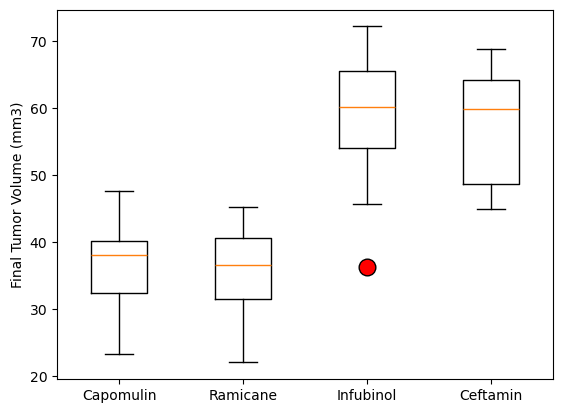

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume, labels=treatment_list, flierprops=dict(markerfacecolor='red', marker='o', markersize=12))
plt.ylabel('Final Tumor Volume (mm3)')

# Show the chart
plt.show()

## Line and Scatter Plots

In [27]:
print(clean_df.head())

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


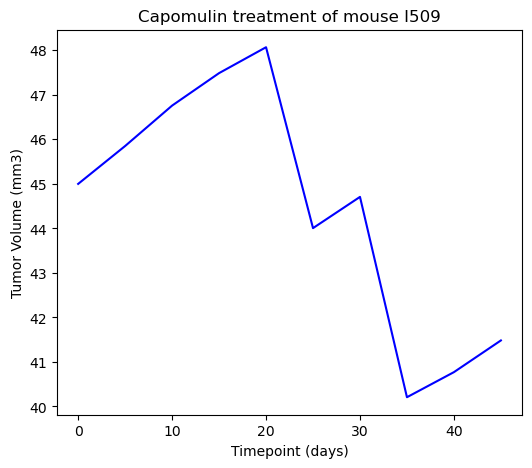

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_treatment = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == 'l509')]

# Create the chart
plt.figure(figsize=(6, 5))
plt.plot(capomulin_treatment['Timepoint'], capomulin_treatment['Tumor Volume (mm3)'], linestyle='-', color='blue')
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)") 
plt.ylabel("Tumor Volume (mm3)")

# Show the chart
plt.show()

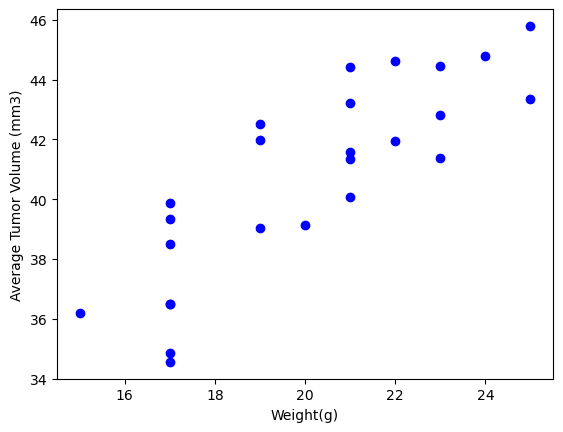

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Create the chart
average_volume = capomulin_regimen.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(average_volume['Weight (g)'],average_volume['Tumor Volume (mm3)'], color='blue')
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the chart
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


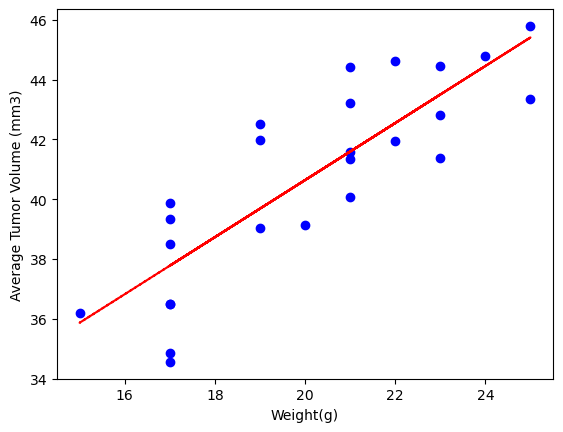

In [31]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_regimen = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

average_volume = capomulin_regimen.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

slope, intercept, rvalue, pvalue,  stderr = st.linregress(average_volume['Weight (g)'], average_volume['Tumor Volume (mm3)'])
fit = slope * average_volume['Weight (g)'] + intercept

print(f"The correlation between mouse weight and the average tumor volume is {rvalue:.2f}")

# Create the chart
plt.scatter(average_volume['Weight (g)'],average_volume['Tumor Volume (mm3)'], color='blue')
plt.plot(average_volume['Weight (g)'], fit, "--", color='red')
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the chart
plt.show()
